<h1><center>Prediction of lung cancer </center></h1>

predicting the likelihood of a patient developing lung cancer
identifying risk factors for lung cancer
determining the most effective treatment for a patient with lung cancer

<div class="list-group" id="list-tab" role="tablist">
<h2 class="list-group-item list-group-item-action active" data-toggle="list" style='background:lightgreen; border:0; color:white' role="tab" aria-controls="home"><center>Quick navigation</center></h2>

* [0. Installation of libraries](#0)
* [1. Basic Data Overview](#1)
* [2. Analysis of data](#2)
* [3. EDA](#3)
* [4. Classification models](#4)
* [5. Building Neural Network Model](#5)

<a id="0"></a>
<h2 style='background:lightgreen; border:0; color:white'><center>0. Installation of libraries</center><h2>

In [1]:
!pip install scikit-plot
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import plotly 
import plotly.express as px
import plotly.express as ex
import plotly.graph_objs as go
import plotly.offline as pyo
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
pyo.init_notebook_mode()
from imblearn.over_sampling import SMOTE
import scikitplot as skplt
from sklearn import preprocessing 

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import linear_model 
from sklearn import tree 
from sklearn import ensemble 
from sklearn import metrics 

from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
sns.set_palette("Set3")
from matplotlib import style
style.use("ggplot")
import os
from google.colab import drive
drive.mount('/content/drive')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Mounted at /content/drive


<a id="1"></a>
<h2 style='background:lightgreen; border:0; color:white'><center>1. Basic Data Overview</center><h2>

In [3]:
df = pd.read_csv("/content/drive/MyDrive/dataset/cancer patient data sets.csv")
display(df)
print(df.info())

index Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0        0         P1   33       1              2            4             5   
1        1        P10   17       1              3            1             5   
2        2       P100   35       1              4            5             6   
3        3      P1000   37       1              7            7             7   
4        4       P101   46       1              6            8             7   
..     ...        ...  ...     ...            ...          ...           ...   
995    995       P995   44       1              6            7             7   
996    996       P996   37       2              6            8             7   
997    997       P997   25       2              4            5             6   
998    998       P998   18       2              6            8             7   
999    999       P999   47       1              6            5             6   

     OccuPational Hazards  Genetic Risk  chronic Lung Disease  ...  Fatigue  \
0                       4             3                     2  ...        3   
1                       3             4                     2  ...        1   
2                       5             5                     4  ...        8   
3                       7             6                     7  ...        4   
4                       7             7                     6  ...        3   
..                    ...           ...                   ...  ...      ...   
995                     7             7                     6  ...        5   
996                     7             7                     6  ...        9   
997                     5             5                     4  ...        8   
998                     7             7                     6  ...        3   
999                     5             5                     4  ...        8   

     Weight Loss  Shortness of Breath  Wheezing  Swallowing Difficulty  \
0              4                    2         2                      3   
1              3                    7         8                      6   
2              7                    9         2                      1   
3              2                    3         1                      4   
4              2                    4         1                      4   
..           ...                  ...       ...                    ...   
995            3                    2         7                      8   
996            6                    5         7                      2   
997            7                    9         2                      1   
998            2                    4         1                      4   
999            7                    9         2                      1   

     Clubbing of Finger Nails  Frequent Cold  Dry Cough  Snoring   Level  
0                           1              2          3        4     Low  
1                           2              1          7        2  Medium  
2                           4              6          7        2    High  
3                           5              6          7        5    High  
4                           2              4          2        3    High  
..                        ...            ...        ...      ...     ...  
995                         2              4          5        3    High  
996                         4              3          1        4    High  
997                         4              6          7        2    High  
998                         2              4          2        3    High  
999                         4              6          7        2    High  

[1000 rows x 26 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

<a id="2"></a>
<h2 style='background:lightgreen; border:0; color:white'><center>2. Analysis of data</center><h2>

In [4]:
df.describe()

index          Age       Gender  Air Pollution  Alcohol use  \
count  1000.000000  1000.000000  1000.000000      1000.0000  1000.000000   
mean    499.500000    37.174000     1.402000         3.8400     4.563000   
std     288.819436    12.005493     0.490547         2.0304     2.620477   
min       0.000000    14.000000     1.000000         1.0000     1.000000   
25%     249.750000    27.750000     1.000000         2.0000     2.000000   
50%     499.500000    36.000000     1.000000         3.0000     5.000000   
75%     749.250000    45.000000     2.000000         6.0000     7.000000   
max     999.000000    73.000000     2.000000         8.0000     8.000000   

       Dust Allergy  OccuPational Hazards  Genetic Risk  chronic Lung Disease  \
count   1000.000000           1000.000000   1000.000000           1000.000000   
mean       5.165000              4.840000      4.580000              4.380000   
std        1.980833              2.107805      2.126999              1.848518   
min        1.000000              1.000000      1.000000              1.000000   
25%        4.000000              3.000000      2.000000              3.000000   
50%        6.000000              5.000000      5.000000              4.000000   
75%        7.000000              7.000000      7.000000              6.000000   
max        8.000000              8.000000      7.000000              7.000000   

       Balanced Diet  ...  Coughing of Blood      Fatigue  Weight Loss  \
count    1000.000000  ...        1000.000000  1000.000000  1000.000000   
mean        4.491000  ...           4.859000     3.856000     3.855000   
std         2.135528  ...           2.427965     2.244616     2.206546   
min         1.000000  ...           1.000000     1.000000     1.000000   
25%         2.000000  ...           3.000000     2.000000     2.000000   
50%         4.000000  ...           4.000000     3.000000     3.000000   
75%         7.000000  ...           7.000000     5.000000     6.000000   
max         7.000000  ...           9.000000     9.000000     8.000000   

       Shortness of Breath     Wheezing  Swallowing Difficulty  \
count          1000.000000  1000.000000            1000.000000   
mean              4.240000     3.777000               3.746000   
std               2.285087     2.041921               2.270383   
min               1.000000     1.000000               1.000000   
25%               2.000000     2.000000               2.000000   
50%               4.000000     4.000000               4.000000   
75%               6.000000     5.000000               5.000000   
max               9.000000     8.000000               8.000000   

       Clubbing of Finger Nails  Frequent Cold    Dry Cough      Snoring  
count               1000.000000    1000.000000  1000.000000  1000.000000  
mean                   3.923000       3.536000     3.853000     2.926000  
std                    2.388048       1.832502     2.039007     1.474686  
min                    1.000000       1.000000     1.000000     1.000000  
25%                    2.000000       2.000000     2.000000     2.000000  
50%                    4.000000       3.000000     4.000000     3.000000  
75%                    5.000000       5.000000     6.000000     4.000000  
max                    9.000000       7.000000     7.000000     7.000000  

[8 rows x 24 columns]

In [5]:
df.drop(["index", "Patient Id"], axis = 1, inplace = True)

In [6]:
fig = px.box(df,
                y='Age',
                x='Level',
            color = "Level")
fig.show()

In [7]:
gender = df.groupby('Level')['Gender'].value_counts(normalize=True).reset_index(name='count')
fig = px.bar(gender,
            x = 'Level',
            y='count', 
            color='Gender',
            labels = '')
fig.show()

In [8]:
features = list(df.columns[:-1])
n = len(features)
n

23

In [9]:
def histplots(df, colored=False):
    k = 0
    cols = df.columns[2:-1]
    n = 7
    m = 3
    fig, axes = plt.subplots(nrows=n, ncols=m, figsize=(15, 10))
    for i in range(n):
        for j in range(m):
            if colored:
                sns.histplot(df, x=df[df.columns[k]], ax=axes[i][j], hue=df.columns[-1])
            else:
                sns.histplot(df, x=df[df.columns[k]], ax=axes[i][j],color='g')
            k += 1

    plt.tight_layout()
    plt.show()

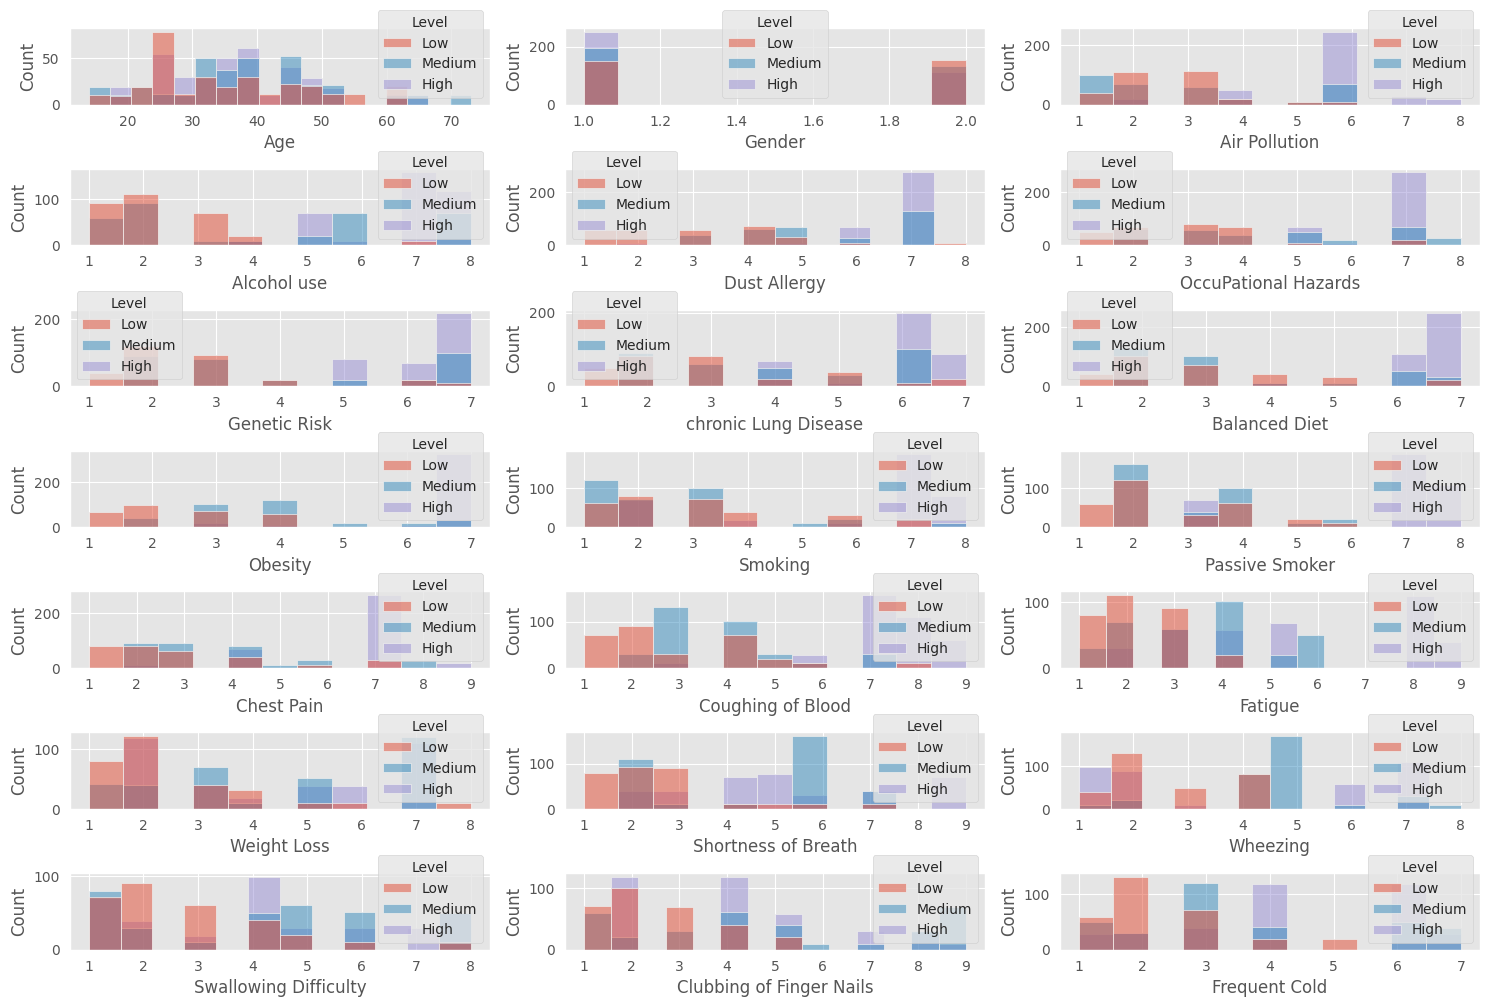

In [10]:
histplots(df, colored=True)

<a id="3"></a>
<h2 style='background:lightgreen; border:0; color:white'><center>3. EDA</center><h2>

In [11]:
#check for NaN
a = df.isnull().mean()*100
b = a[a>0].sort_values(ascending = False)
b[b>1]

Series([], dtype: float64)

# Data transformation

In [12]:
train_df = df.copy()

In [13]:
train_df['Level'] = train_df['Level'].map({'High': 3, 'Medium': 2, 'Low': 1})

In [14]:
train_df['Level'].value_counts()

3    365
2    332
1    303
Name: Level, dtype: int64

In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1000 non-null   int64
 1   Gender                    1000 non-null   int64
 2   Air Pollution             1000 non-null   int64
 3   Alcohol use               1000 non-null   int64
 4   Dust Allergy              1000 non-null   int64
 5   OccuPational Hazards      1000 non-null   int64
 6   Genetic Risk              1000 non-null   int64
 7   chronic Lung Disease      1000 non-null   int64
 8   Balanced Diet             1000 non-null   int64
 9   Obesity                   1000 non-null   int64
 10  Smoking                   1000 non-null   int64
 11  Passive Smoker            1000 non-null   int64
 12  Chest Pain                1000 non-null   int64
 13  Coughing of Blood         1000 non-null   int64
 14  Fatigue                   1000 non-null  

# Significant features

<function matplotlib.pyplot.show(close=None, block=None)>

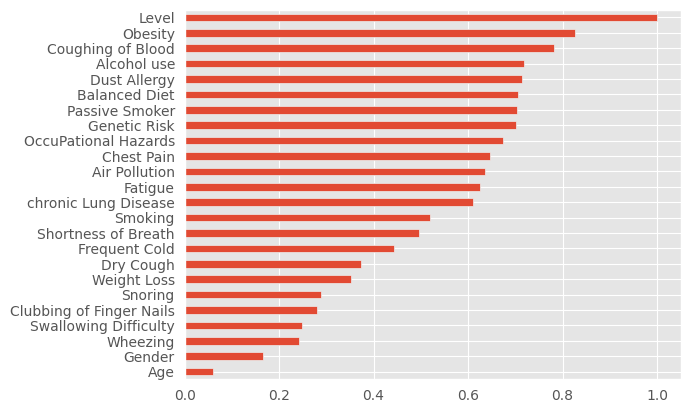

In [16]:
train_df.corr()['Level'].apply(lambda x: abs(x)).sort_values().plot.barh()
plt.show

<Axes: >

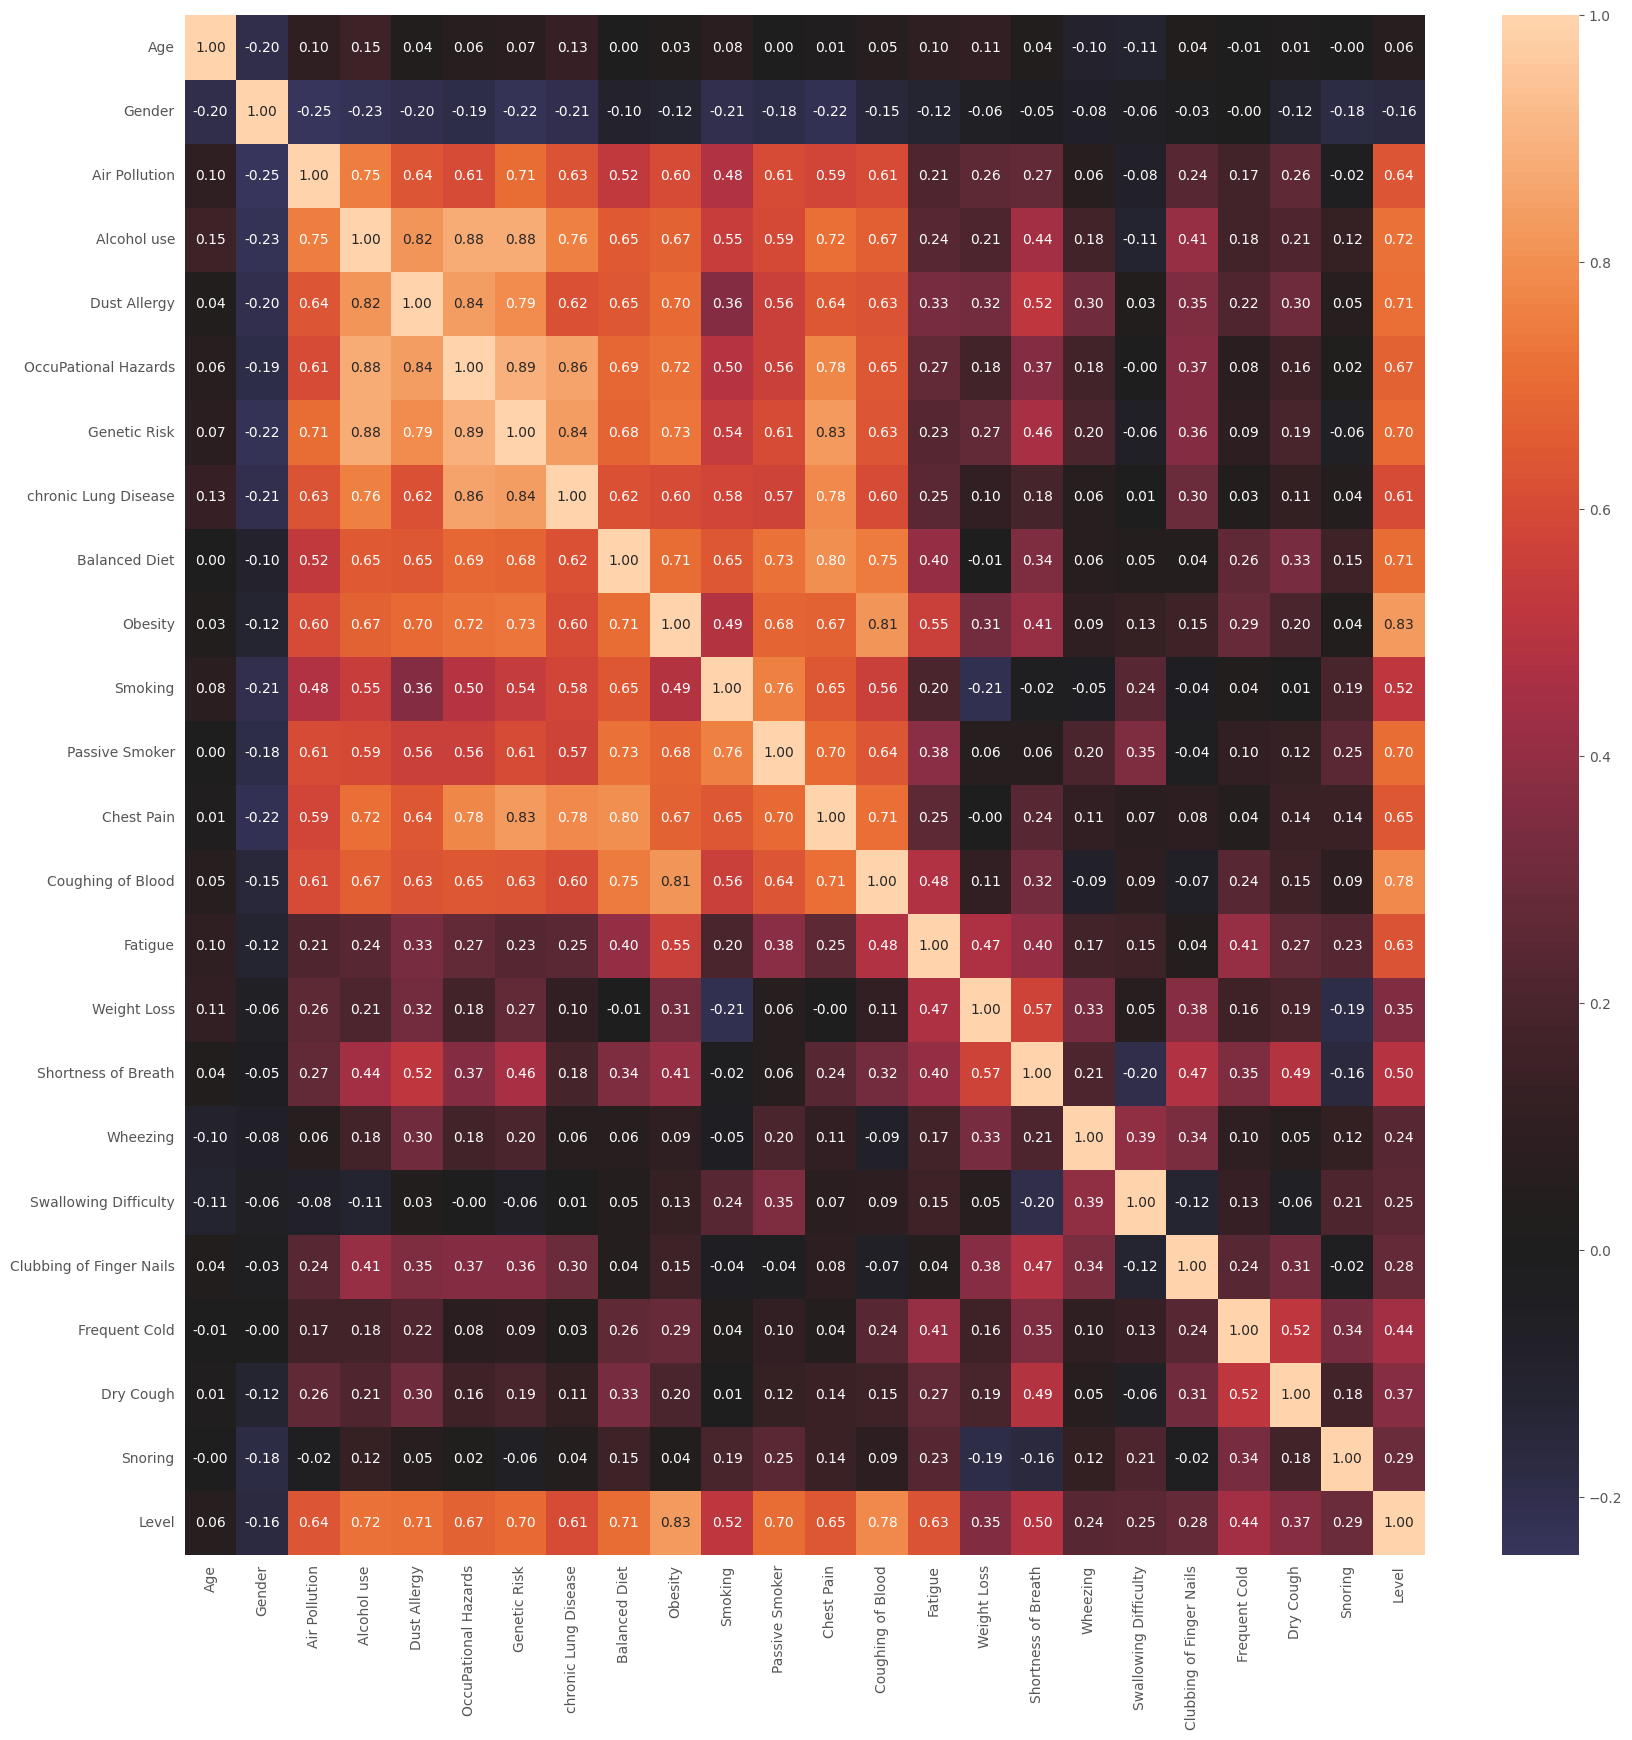

In [17]:
plt.figure(figsize=(20,20))  
sns.heatmap(train_df.corr(),fmt='.2f',annot=True, center=0)

# Data selection

In [18]:
train_df.columns

Index(['Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy',
       'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease',
       'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain',
       'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath',
       'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails',
       'Frequent Cold', 'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

In [19]:
#Exception of direct symptoms of cancer
symptoms = ['Chest Pain','Coughing of Blood', 'Shortness of Breath',
       'Wheezing', 'Swallowing Difficulty', 'Frequent Cold', 'Dry Cough']
clean_df = train_df.drop(symptoms, axis = 1)

<a id="4"></a>
<h2 style='background:lightgreen; border:0; color:white'><center>4. Classification models</center><h2>

In [20]:
X = clean_df.drop('Level', axis = 1)
y = clean_df['Level']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state = 42, test_size = 0.33
)

In [22]:
#normalization
scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns= X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [23]:
# Selection of features
from sklearn.feature_selection import SelectKBest, f_regression
selector = SelectKBest(f_regression, k=3)
selector.fit(X_train, y_train)
 
selector.get_feature_names_out()

array(['Alcohol use', 'Genetic Risk', 'Obesity'], dtype=object)

In [24]:
cols = ['Alcohol use', 'Genetic Risk', 'Obesity']
X_train, X_test = X_train[cols], X_test[cols]
X_test

Alcohol use  Genetic Risk  Obesity
463            4             5        6
434            3             1        1
542            8             7        7
788            8             7        7
264            2             1        2
..           ...           ...      ...
461            7             6        7
925            7             6        2
551            7             7        7
482            3             7        2
702            1             3        3

[330 rows x 3 columns]

# Logistic regression

In [25]:
# Logistic regression
log_reg = linear_model.LogisticRegression(random_state=42, solver = 'sag', max_iter=1000)

log_reg.fit(X_train_scaled, y_train)

y_pred_train = log_reg.predict(X_train_scaled)
y_pred_test = log_reg.predict(X_test_scaled)
print('Train df:',metrics.classification_report(y_train, y_pred_train))
print('Valid df:',metrics.classification_report(y_test, y_pred_test))

Train df:               precision    recall  f1-score   support

           1       0.96      0.94      0.95       203
           2       0.94      0.97      0.96       222
           3       1.00      1.00      1.00       245

    accuracy                           0.97       670
   macro avg       0.97      0.97      0.97       670
weighted avg       0.97      0.97      0.97       670

Valid df:               precision    recall  f1-score   support

           1       0.97      0.90      0.93       100
           2       0.91      0.96      0.94       110
           3       0.99      1.00      1.00       120

    accuracy                           0.96       330
   macro avg       0.96      0.95      0.96       330
weighted avg       0.96      0.96      0.96       330



# Decision Tree

In [26]:
dt_clf = tree.DecisionTreeClassifier(
    criterion='entropy', 
    random_state=42,
    max_depth=11
)

dt_clf.fit(X_train_scaled, y_train)
y_pred_train = dt_clf.predict(X_train_scaled)
y_pred_test = dt_clf.predict(X_test_scaled)
print('Train df:',metrics.classification_report(y_train, y_pred_train))
print('Valid df:',metrics.classification_report(y_test, y_pred_test))

Train df:               precision    recall  f1-score   support

           1       1.00      1.00      1.00       203
           2       1.00      1.00      1.00       222
           3       1.00      1.00      1.00       245

    accuracy                           1.00       670
   macro avg       1.00      1.00      1.00       670
weighted avg       1.00      1.00      1.00       670

Valid df:               precision    recall  f1-score   support

           1       1.00      1.00      1.00       100
           2       1.00      1.00      1.00       110
           3       1.00      1.00      1.00       120

    accuracy                           1.00       330
   macro avg       1.00      1.00      1.00       330
weighted avg       1.00      1.00      1.00       330



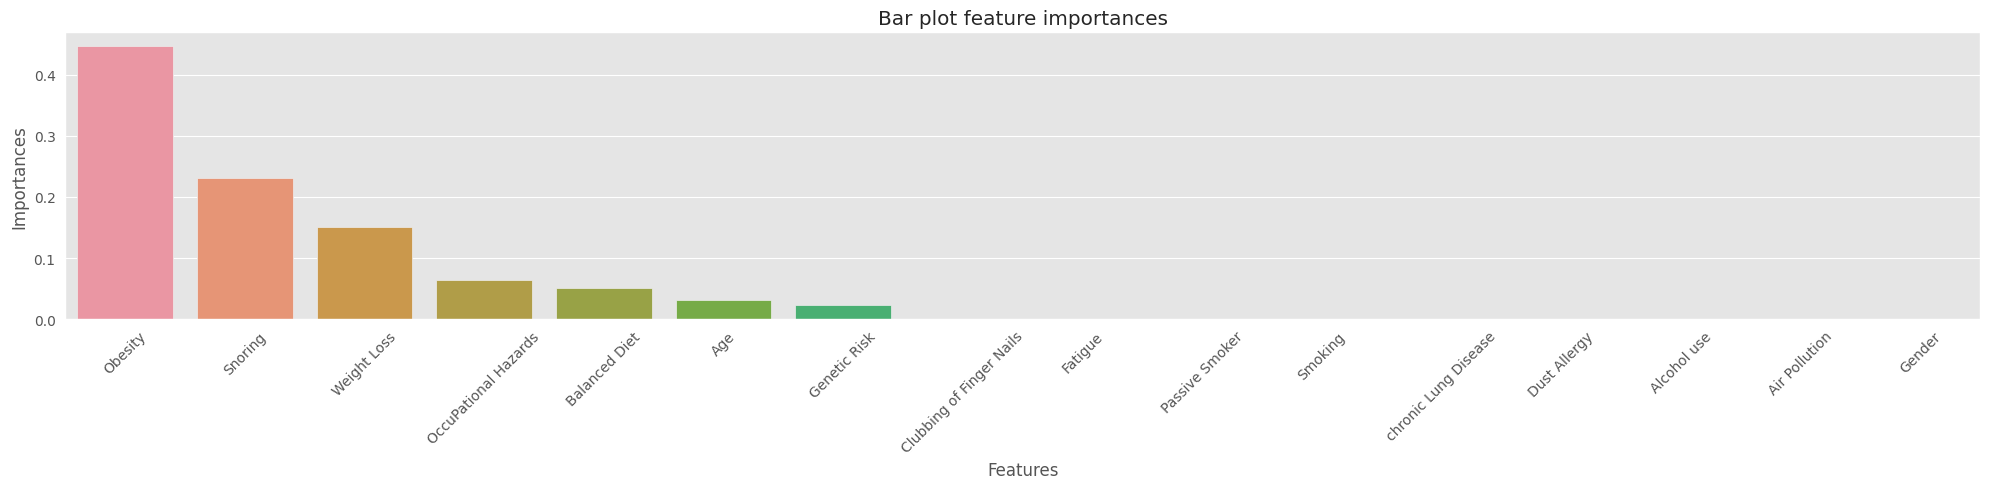

In [27]:
fig, ax = plt.subplots(figsize=(20, 5))
feature = X_train_scaled.columns
feature_importances = dt_clf.feature_importances_

sorted_indices = np.argsort(feature_importances)[::-1]

sns.barplot(x=feature[sorted_indices], y=feature_importances[sorted_indices], ax=ax)

ax.set_title('Bar plot feature importances')
ax.set_xlabel('Features')
ax.set_ylabel('Importances')
ax.set_xticklabels(feature[sorted_indices], rotation=45)  # Specify rotation angle

plt.tight_layout()
plt.show()



# Random forest

In [28]:

rf_clf_full = ensemble.RandomForestClassifier(
    n_estimators=100, 
    criterion='gini',
    max_depth=10, 
    max_features='sqrt', 
    random_state=42, 
    min_samples_leaf = 5
)

rf_clf_full.fit(X_train_scaled, y_train)

y_pred_train = rf_clf_full.predict(X_train_scaled)
y_pred_test = rf_clf_full.predict(X_test_scaled)

print('Train df:',metrics.classification_report(y_train, y_pred_train))
print('Valid df:',metrics.classification_report(y_test, y_pred_test))

Train df:               precision    recall  f1-score   support

           1       1.00      1.00      1.00       203
           2       1.00      1.00      1.00       222
           3       1.00      1.00      1.00       245

    accuracy                           1.00       670
   macro avg       1.00      1.00      1.00       670
weighted avg       1.00      1.00      1.00       670

Valid df:               precision    recall  f1-score   support

           1       1.00      1.00      1.00       100
           2       1.00      1.00      1.00       110
           3       1.00      1.00      1.00       120

    accuracy                           1.00       330
   macro avg       1.00      1.00      1.00       330
weighted avg       1.00      1.00      1.00       330



<a id="5"></a>
<h2 style='background:lightgreen; border:0; color:white'><center>5. Building Neural Network Model</center><h2>


**A neural network is a simplified model of the way the human brain processes information. It works by simulating a large number of interconnected processing units that resemble abstract versions of neurons. The processing units are arranged in layers.**


In [30]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

model = Sequential()

model.add(Dense(8, activation = "relu", input_dim = X_train_scaled.shape[1]))
model.add(Dense(16, activation = "relu"))
model.add(Dropout(0.1))
model.add(Dense(8, activation = "relu"))
model.add(Dense(3, activation = "softmax"))

model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])
history = model.fit(X_train_scaled, y_train, epochs = 40, validation_split = 0.3)

Epoch 1/40


ValueError: ignored

**Checking losses in our neural network model.**

In [ ]:
plt.figure(figsize = (8,5))
plt.plot(history.history["loss"], color = "r", label= "Training loss", marker = "o")
plt.plot(history.history["val_loss"], color = "b", label= "Validation loss", marker = "o")
plt.title("Training VS Validation loss", fontsize = 20)
plt.xlabel("No. of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Checking accuracies in our neural network model.**

In [ ]:
plt.figure(figsize = (8,5))
plt.plot(history.history["accuracy"], color = "r", label = "Training accuracy", marker = "o")
plt.plot(history.history["val_accuracy"], color = "b", label = "Validation accuracy", marker = "o")
plt.title("Training VS Validation Accuracy", fontsize = 20)
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Visualizing Neural Network Model

**Visualizing the Neural Network model with ann_visualizer.**

In [ ]:
#!pip3 install ann_visualizer

#pip3 install graphviz

#from ann_visualizer.visualize import ann_viz

#ann_viz(model, view = True, filename = "ann.png")

![ann.png](attachment:5926eb7f-4f21-482a-8f73-b9f75d0c2744.png)

**This is the visualization of our neural network model.**
**As we can see, we have**
* **23 input layers**
* **8 hidden layers**
* **16 hidden layers** 
* **8 hidden layers** 
* **3 output layers**